In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Датасет

In [118]:
df = pd.read_csv("American_Housing_Data_20231209.csv").dropna()
df

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,2626 27TH AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39977,98199,2295000.0,4,4,2878,3215 32ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39978,98199,950000.0,3,2,1380,3257 22ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39979,98199,425000.0,2,1,856,3711 26TH PL W APT 102,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


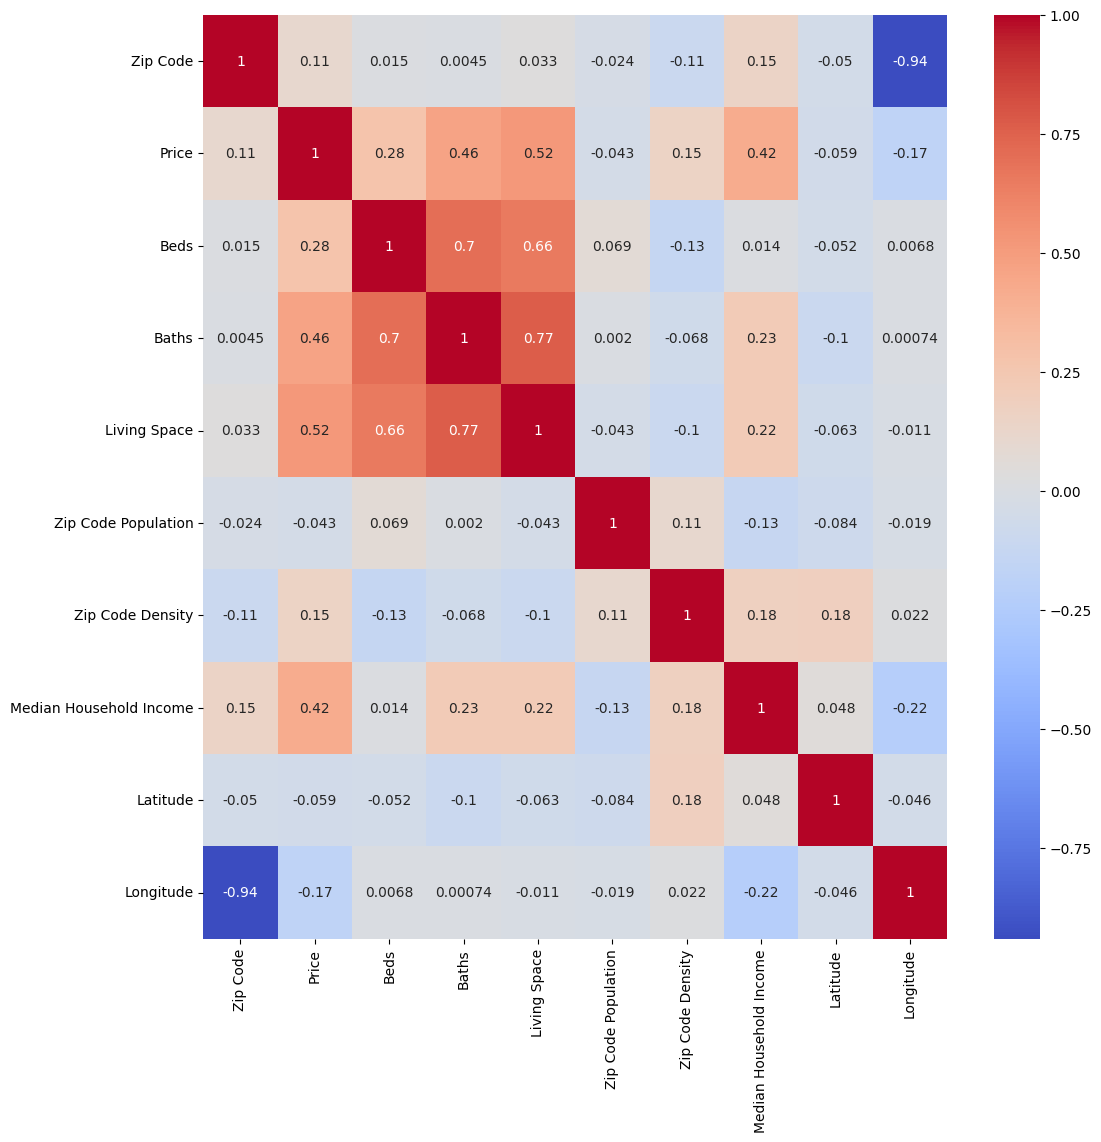

In [119]:
import seaborn as sns
correlation = df.corr(method='pearson',numeric_only=True)
plt.figure(figsize=(12, 12))  # Установите размер 
sns.heatmap(correlation, annot=True, cmap='coolwarm') # Тепловая карта
plt.show()

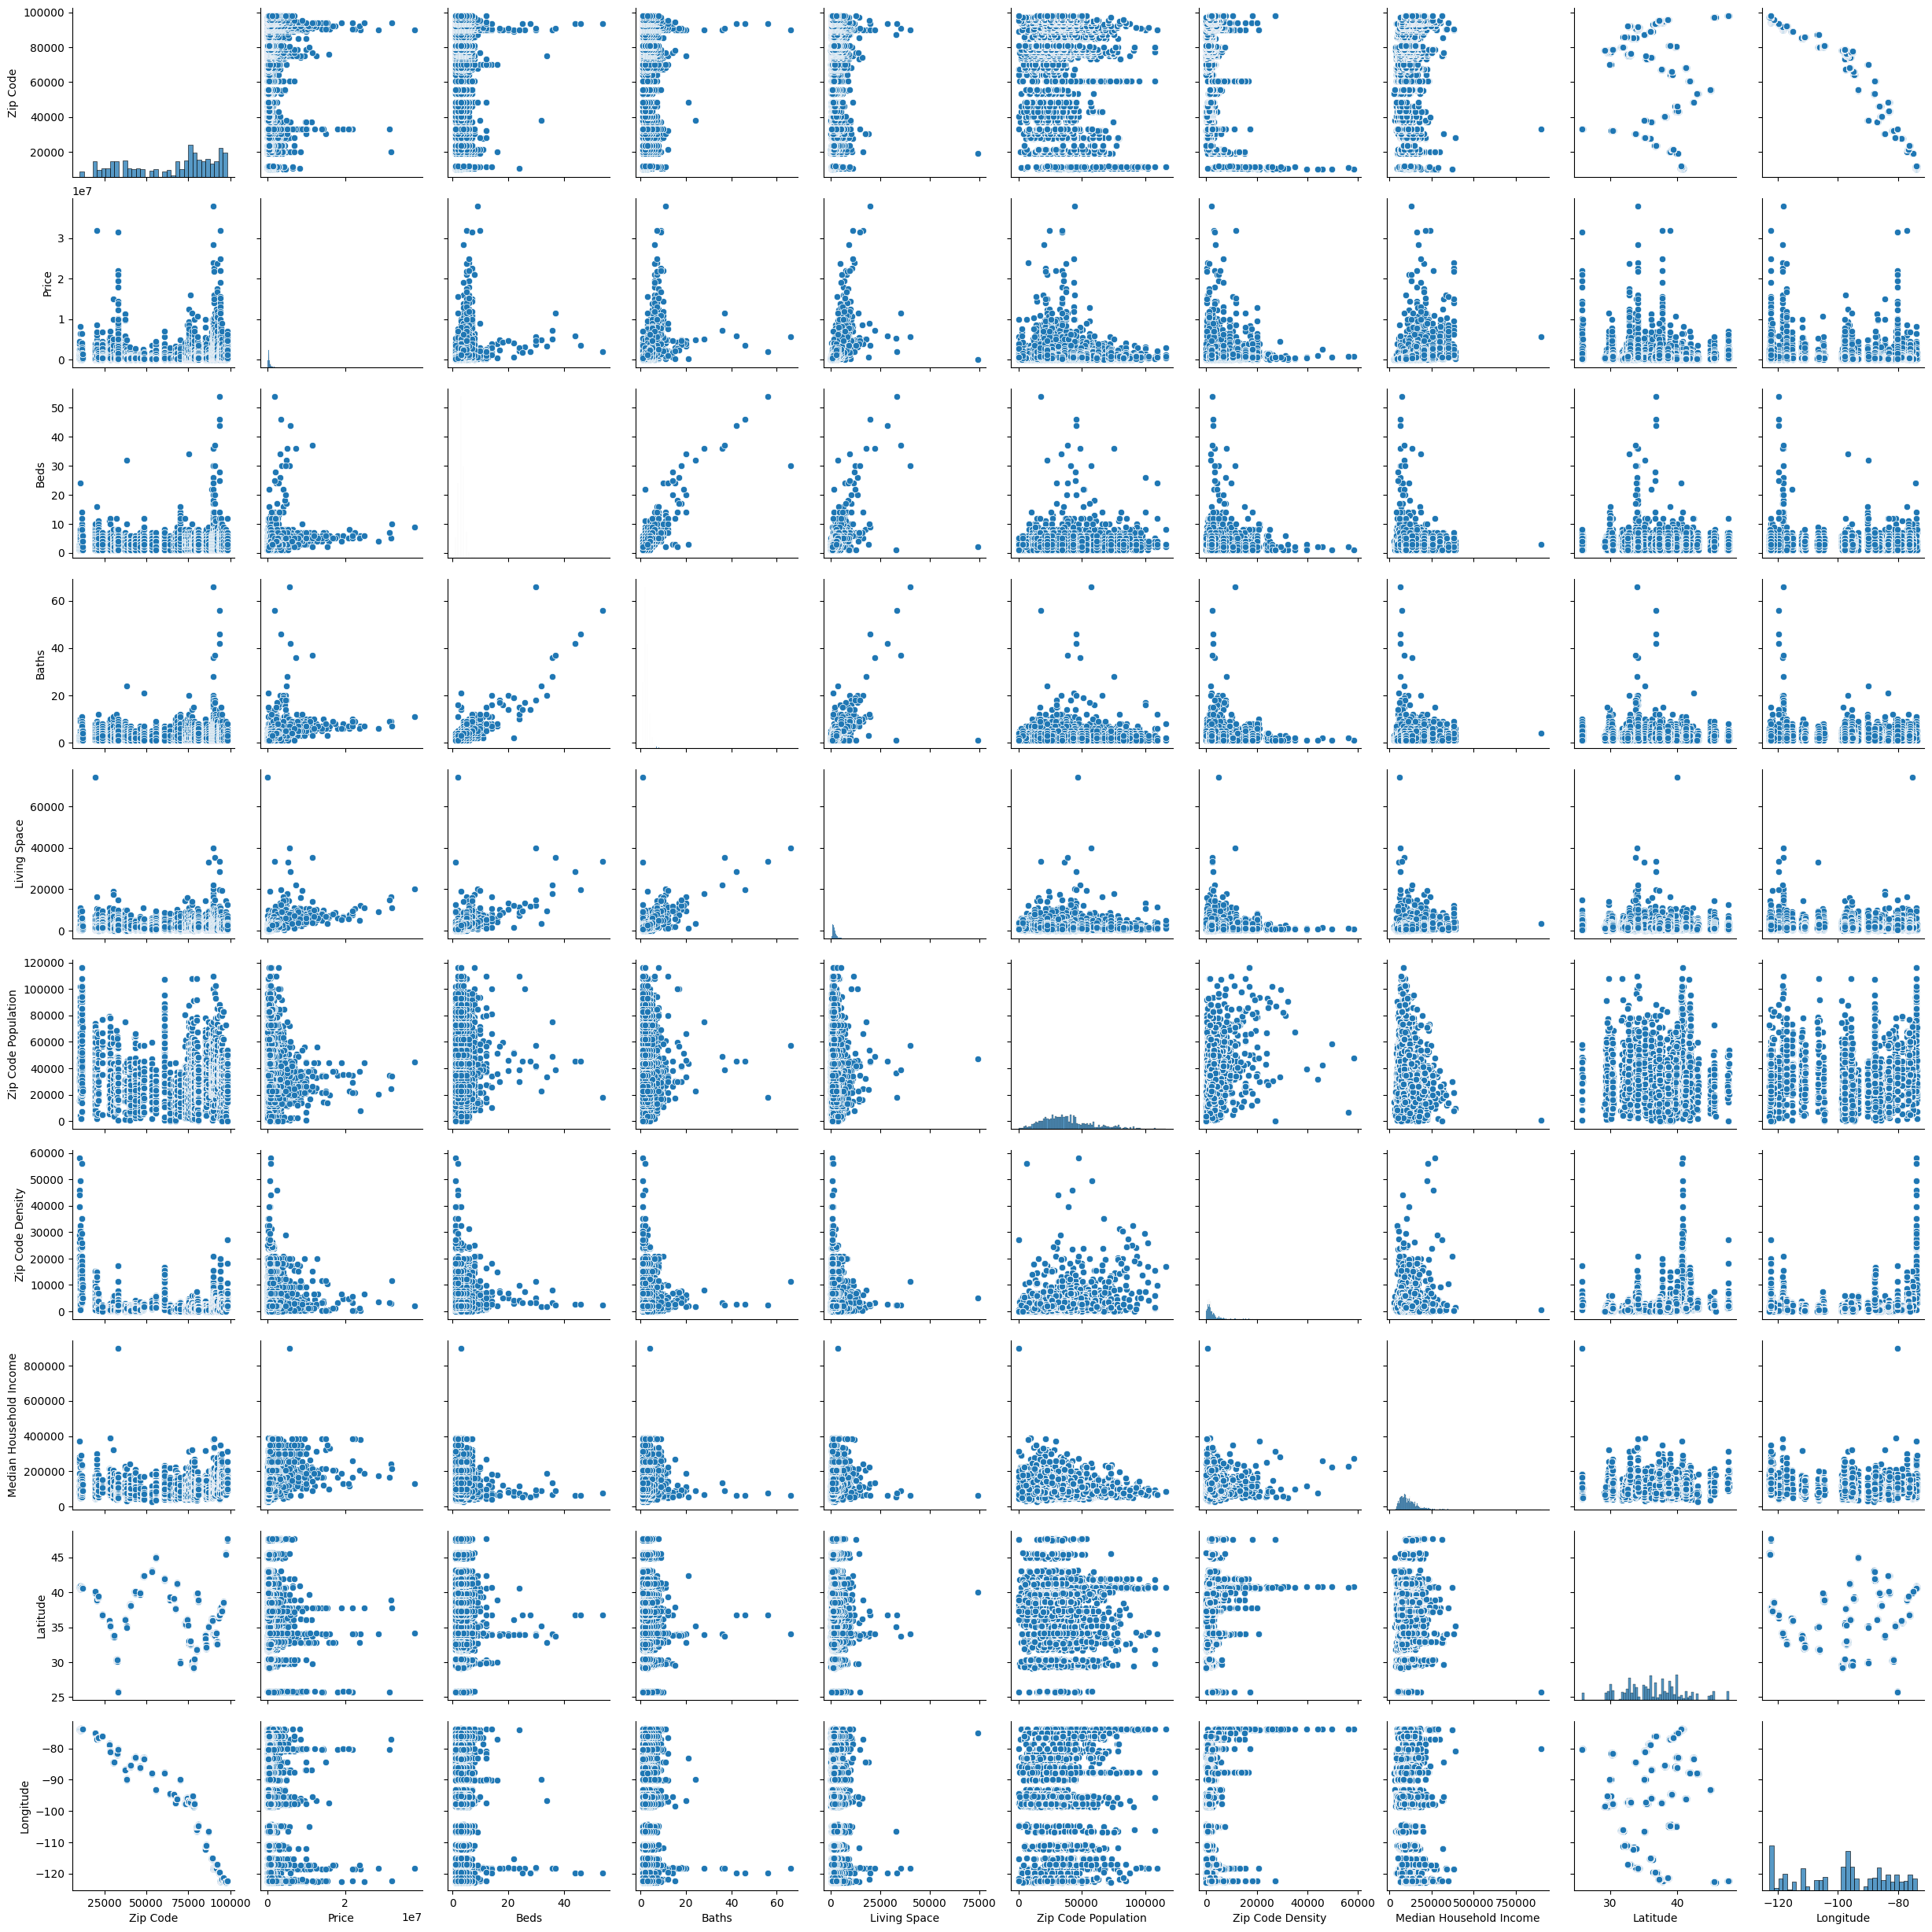

In [120]:
sns.pairplot(df)

In [121]:
df = df.drop(columns=["Address", "Longitude"])

Убиреам категориальные данные

In [122]:
df_catless = df.drop(columns=["City", "State", "County"])
df_catless

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude
0,10013,3999000.0,2,3,1967,29563,20967.9,370046.0,40.72001
1,10013,3999000.0,2,3,1967,29563,20967.9,370046.0,40.72001
2,10014,1650000.0,1,1,718,29815,23740.9,249880.0,40.73407
3,10014,760000.0,3,2,1538,29815,23740.9,249880.0,40.73407
4,10014,1100000.0,1,1,600,29815,23740.9,249880.0,40.73407
...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,22890,2086.8,205611.0,47.65139
39977,98199,2295000.0,4,4,2878,22890,2086.8,205611.0,47.65139
39978,98199,950000.0,3,2,1380,22890,2086.8,205611.0,47.65139
39979,98199,425000.0,2,1,856,22890,2086.8,205611.0,47.65139


In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_catless.drop("Price", axis=1), df_catless["Price"], test_size=0.3, random_state=42)
X_train


,Zip Code,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude
31005,87114,4,3,2621,69717,1285.7,96944.0,35.19718
24778,78738,4,4,3245,26806,245.9,205511.0,30.30668
17259,68131,2,2,1375,13497,2520.0,64711.0,41.26435
10989,43211,4,2,979,22553,1847.5,45952.0,40.01163
25681,79930,3,2,1342,26787,1381.3,54061.0,31.81078
...,...,...,...,...,...,...,...,...
6265,30339,3,2,1784,33230,1299.7,135382.0,33.86786
11284,43230,3,3,1251,58956,1115.6,107912.0,40.03648
38160,95838,2,1,1176,41438,1738.1,76618.0,38.64708
860,19130,5,4,3590,29378,9166.1,138891.0,39.96760


Обучение Линейной регрессии

In [124]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [125]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_linreg1 = mean_absolute_error(y_test, y_pred)
rmse_linreg1 = mean_squared_error(y_test, y_pred, squared=False)
print(f"MAE: {mae_linreg1}")
print(f"RMSE: {rmse_linreg1}")

MAE: 307623.7634354252
RMSE: 764640.7797365248


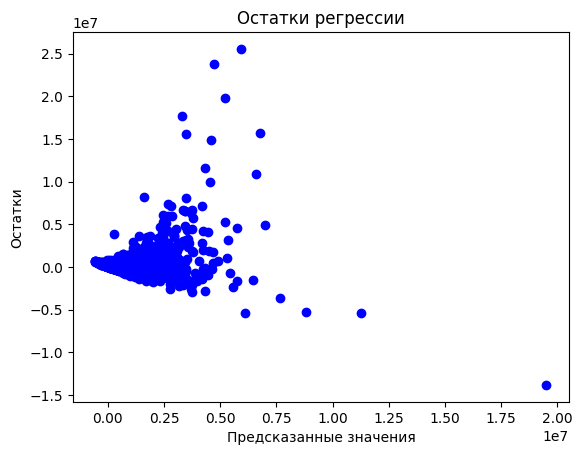

In [146]:
# Предсказание модели
y_pred = linreg.predict(X_test)

# Вычисление остатков
residuals = y_test - y_pred

# Визуализация остатков
plt.scatter(y_pred, residuals, color='blue')
plt.title('Остатки регрессии')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()


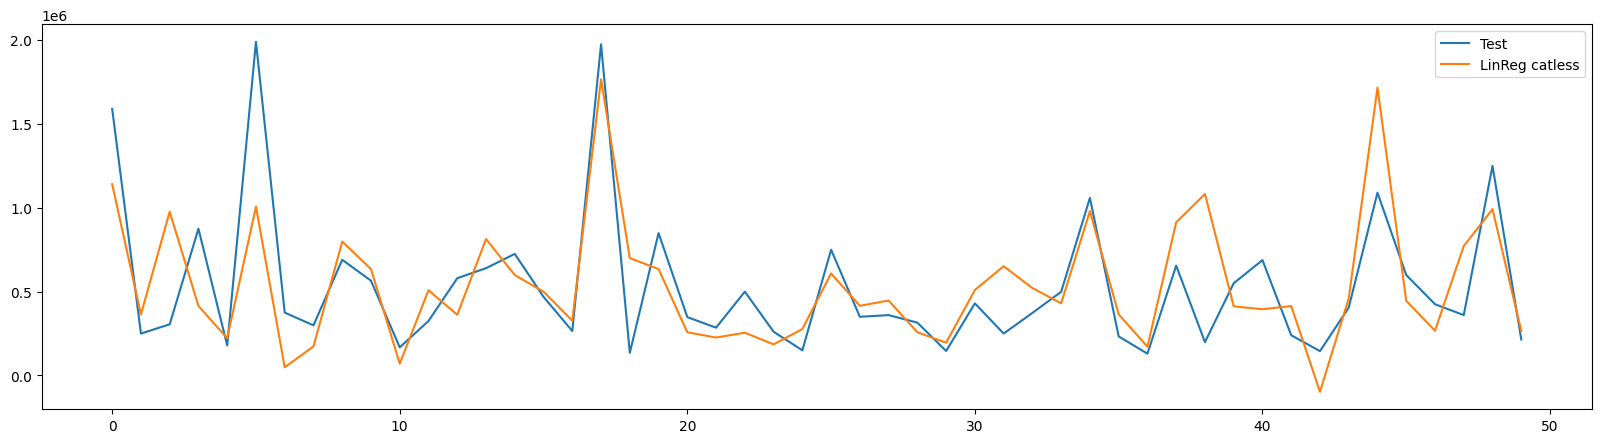

In [127]:
y_test_plot = y_test[:50].values
y_catless_linreg_plot = y_pred[:50]
plt.figure(figsize=(20,5))
plt.plot(y_test_plot, label="Test")
plt.plot(y_catless_linreg_plot, label="LinReg catless")
plt.legend()
plt.show()

Обучение XGBRegressor

In [128]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [129]:
mae_xgb1 = mean_absolute_error(y_test, y_pred)
rmse_xgb1 = mean_squared_error(y_test, y_pred, squared=False)
print(f"MAE: {mae_xgb1}")
print(f"RMSE: {rmse_xgb1}")

MAE: 158354.59322725164
RMSE: 550066.4650881549


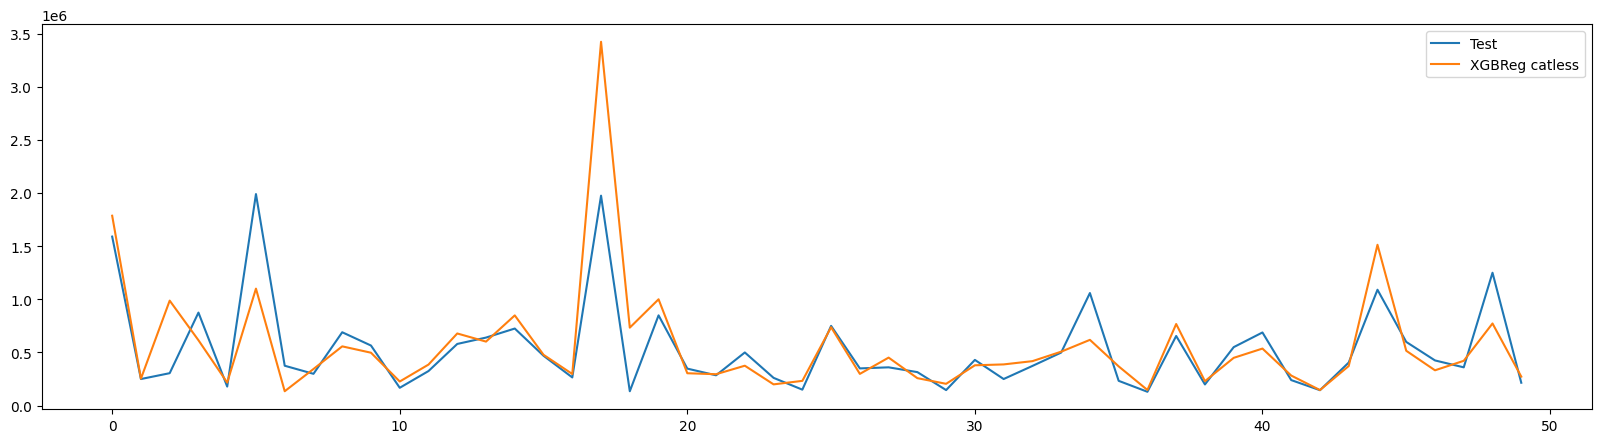

In [130]:
y_catless_xgb_plot = y_pred[:50]
plt.figure(figsize=(20,5))
plt.plot(y_test_plot, label="Test")
plt.plot(y_catless_xgb_plot, label="XGBReg catless")
plt.legend()
plt.show()

Возвращаем категориальные данные, кодируем и снова обучаем

In [131]:
df_enc = df.copy()
df_enc = pd.get_dummies(df_enc, columns=["City", "State", "County"])
df_enc

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,City_Albuquerque,...,County_Travis,County_Tulsa,County_Union,County_Virginia Beach,County_Wagoner,County_Wake,County_Washington,County_Wayne,County_Williamson,County_Wyandotte
0,10013,3999000.0,2,3,1967,29563,20967.9,370046.0,40.72001,0,...,0,0,0,0,0,0,0,0,0,0
1,10013,3999000.0,2,3,1967,29563,20967.9,370046.0,40.72001,0,...,0,0,0,0,0,0,0,0,0,0
2,10014,1650000.0,1,1,718,29815,23740.9,249880.0,40.73407,0,...,0,0,0,0,0,0,0,0,0,0
3,10014,760000.0,3,2,1538,29815,23740.9,249880.0,40.73407,0,...,0,0,0,0,0,0,0,0,0,0
4,10014,1100000.0,1,1,600,29815,23740.9,249880.0,40.73407,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,22890,2086.8,205611.0,47.65139,0,...,0,0,0,0,0,0,0,0,0,0
39977,98199,2295000.0,4,4,2878,22890,2086.8,205611.0,47.65139,0,...,0,0,0,0,0,0,0,0,0,0
39978,98199,950000.0,3,2,1380,22890,2086.8,205611.0,47.65139,0,...,0,0,0,0,0,0,0,0,0,0
39979,98199,425000.0,2,1,856,22890,2086.8,205611.0,47.65139,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
X = df_enc.drop("Price", axis=1)
y = df_enc["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, y_train

(       Zip Code  Beds  Baths  Living Space  Zip Code Population  \
 31005     87114     4      3          2621                69717   
 24778     78738     4      4          3245                26806   
 17259     68131     2      2          1375                13497   
 10989     43211     4      2           979                22553   
 25681     79930     3      2          1342                26787   
 ...         ...   ...    ...           ...                  ...   
 6265      30339     3      2          1784                33230   
 11284     43230     3      3          1251                58956   
 38160     95838     2      1          1176                41438   
 860       19130     5      4          3590                29378   
 15795     64157     3      2          1929                21539   
 
        Zip Code Density  Median Household Income  Latitude  City_Albuquerque  \
 31005            1285.7                  96944.0  35.19718                 1   
 24778             2

In [133]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [134]:
mae_xgb2 = mean_absolute_error(y_test, y_pred)
rmse_xgb2 = mean_squared_error(y_test, y_pred, squared=False)
print(f"MAE Catless: {mae_xgb1}")
print(f"RMSE Catless: {rmse_xgb1}")
print(f"MAE: {mae_xgb2}")
print(f"RMSE: {rmse_xgb2}")

MAE Catless: 158354.59322725164
RMSE Catless: 550066.4650881549
MAE: 155585.60804260202
RMSE: 519318.24290713615


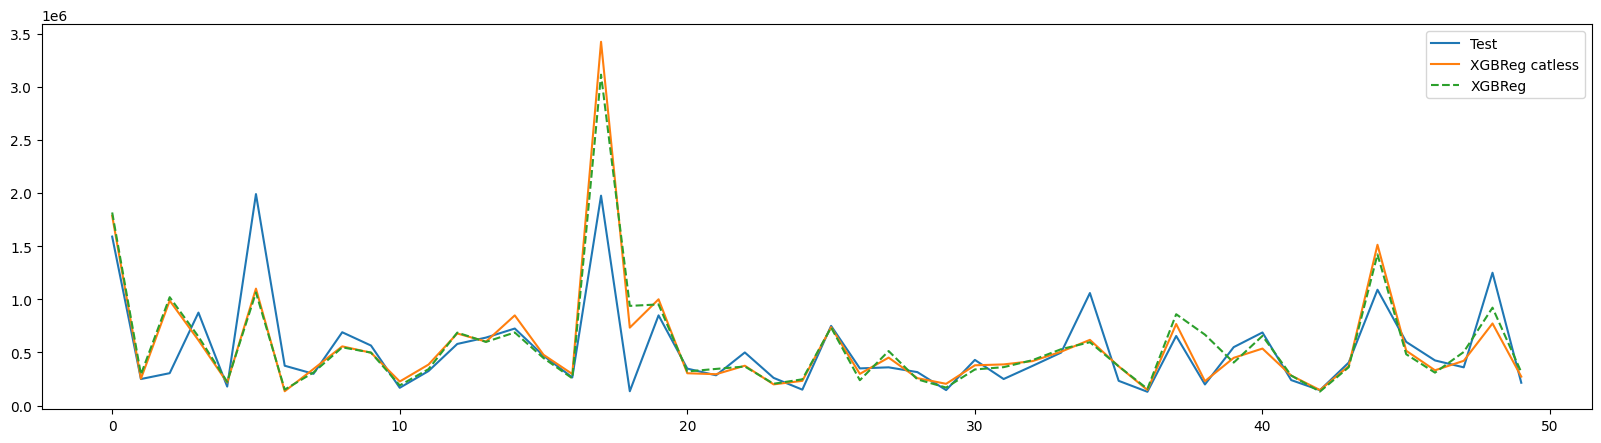

In [135]:
y_xgb_plot = y_pred[:50]
plt.figure(figsize=(20,5))
plt.plot(y_test_plot, label="Test")
plt.plot(y_catless_xgb_plot, label="XGBReg catless")
plt.plot(y_xgb_plot, label="XGBReg", linestyle="--")
plt.legend()
plt.show()

In [136]:
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [137]:
mae_linreg2 = mean_absolute_error(y_test, y_pred)
rmse_linreg2 = mean_squared_error(y_test, y_pred, squared=False)
print(f"MAE Catless: {mae_linreg1}")
print(f"RMSE Catless: {rmse_linreg1}")
print(f"MAE: {mae_linreg2}")
print(f"RMSE: {rmse_linreg2}")

MAE Catless: 307623.7634354252
RMSE Catless: 764640.7797365248
MAE: 268667.55044905684
RMSE: 757653.8684859482


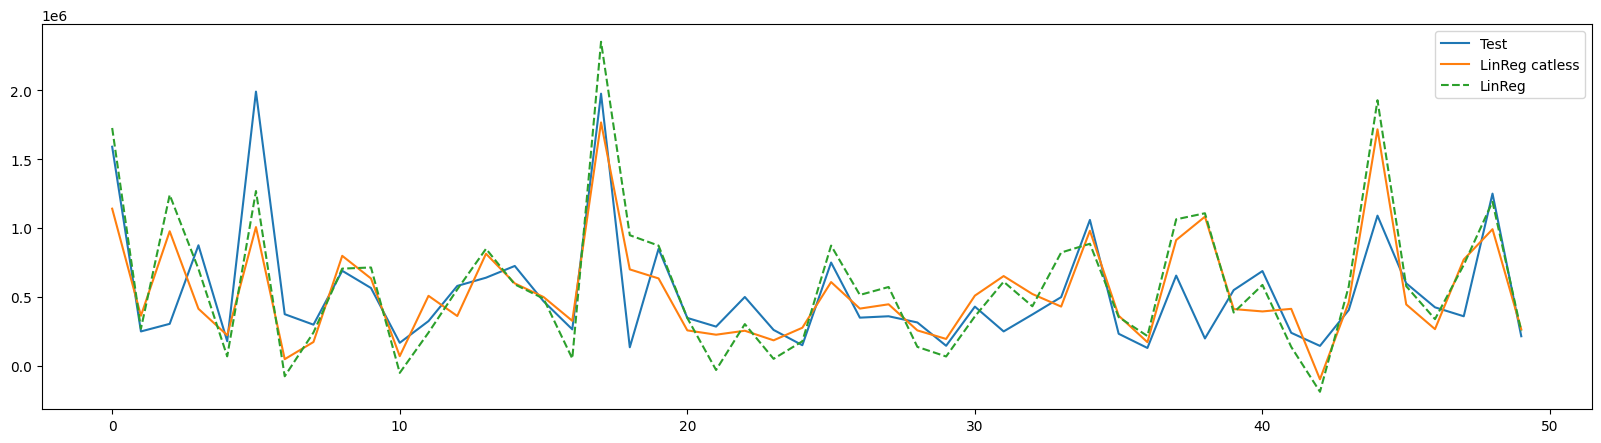

In [138]:
y_linreg_plot = y_pred[:50]
plt.figure(figsize=(20,5))
plt.plot(y_test_plot, label="Test")
plt.plot(y_catless_linreg_plot, label="LinReg catless")
plt.plot(y_linreg_plot, label="LinReg", linestyle="--")
plt.legend()
plt.show()

In [139]:
import category_encoders as ce

# Создайте копию датафрейма
df_enc2 = df.copy()

# Создайте экземпляр TargetEncoder
encoder = ce.TargetEncoder(cols=["City", "State", "County"])

# Примените кодирование
df_enc2 = encoder.fit_transform(df_enc2, y)
df_enc2

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude
0,10013,3999000.0,2,3,1967,9.888129e+05,8.769571e+05,29563,20967.9,9.888129e+05,370046.0,40.72001
1,10013,3999000.0,2,3,1967,9.888129e+05,8.769571e+05,29563,20967.9,9.888129e+05,370046.0,40.72001
2,10014,1650000.0,1,1,718,9.888129e+05,8.769571e+05,29815,23740.9,9.888129e+05,249880.0,40.73407
3,10014,760000.0,3,2,1538,9.888129e+05,8.769571e+05,29815,23740.9,9.888129e+05,249880.0,40.73407
4,10014,1100000.0,1,1,600,9.888129e+05,8.769571e+05,29815,23740.9,9.888129e+05,249880.0,40.73407
...,...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,1.011134e+06,1.011134e+06,22890,2086.8,1.011134e+06,205611.0,47.65139
39977,98199,2295000.0,4,4,2878,1.011134e+06,1.011134e+06,22890,2086.8,1.011134e+06,205611.0,47.65139
39978,98199,950000.0,3,2,1380,1.011134e+06,1.011134e+06,22890,2086.8,1.011134e+06,205611.0,47.65139
39979,98199,425000.0,2,1,856,1.011134e+06,1.011134e+06,22890,2086.8,1.011134e+06,205611.0,47.65139


In [140]:
X_target_enc = df_enc2.drop("Price", axis=1)
y_target_enc = df_enc2["Price"]
X_train, X_test, y_train, y_test = train_test_split(X_target_enc, y_target_enc, test_size=0.3, random_state=42)
X_train

,Zip Code,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude
31005,87114,4,3,2621,436792.845980,4.367928e+05,69717,1285.7,436792.845980,96944.0,35.19718
24778,78738,4,4,3245,916580.799537,5.299484e+05,26806,245.9,916835.031746,205511.0,30.30668
17259,68131,2,2,1375,351892.969519,3.578924e+05,13497,2520.0,348675.408854,64711.0,41.26435
10989,43211,4,2,979,314671.701893,3.129136e+05,22553,1847.5,314025.332911,45952.0,40.01163
25681,79930,3,2,1342,301084.006105,5.299484e+05,26787,1381.3,429776.171903,54061.0,31.81078
...,...,...,...,...,...,...,...,...,...,...,...
6265,30339,3,2,1784,695594.795699,6.955948e+05,33230,1299.7,869461.317616,135382.0,33.86786
11284,43230,3,3,1251,314671.701893,3.129136e+05,58956,1115.6,314025.332911,107912.0,40.03648
38160,95838,2,1,1176,515908.863442,1.182427e+06,41438,1738.1,515908.863442,76618.0,38.64708
860,19130,5,4,3590,332107.824607,3.321078e+05,29378,9166.1,332107.824607,138891.0,39.96760


MAE Catless: 158354.59322725164
RMSE Catless: 550066.4650881549
OHE:
MAE: 155585.60804260202
RMSE: 519318.24290713615
Target Encoding:
MAE: 154318.14569652014
RMSE: 482854.7572090576


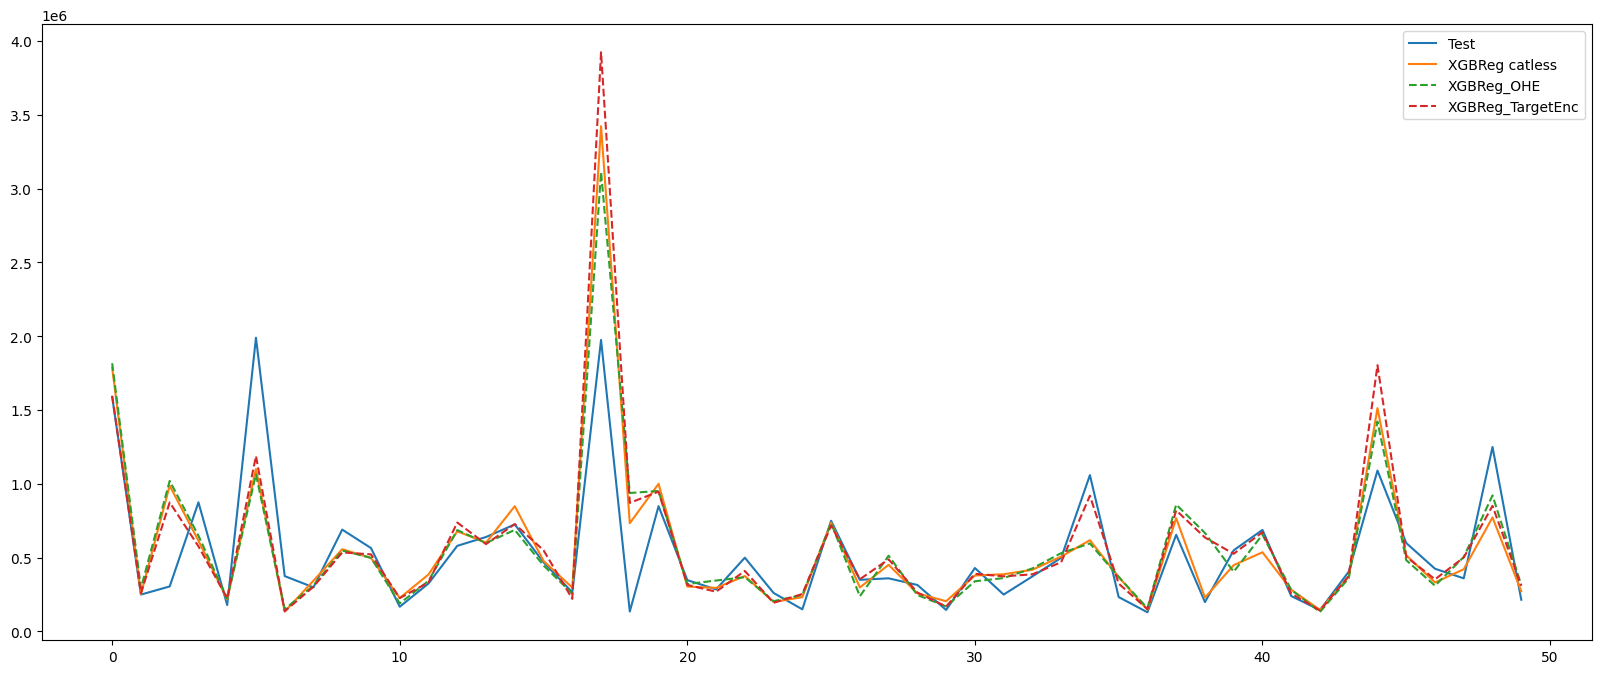

In [141]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

mae_xgb3 = mean_absolute_error(y_test, y_pred)
rmse_xgb3 = mean_squared_error(y_test, y_pred, squared=False)
print(f"MAE Catless: {mae_xgb1}")
print(f"RMSE Catless: {rmse_xgb1}")
print("OHE:")
print(f"MAE: {mae_xgb2}")
print(f"RMSE: {rmse_xgb2}")
print("Target Encoding:")
print(f"MAE: {mae_xgb3}")
print(f"RMSE: {rmse_xgb3}")

y_xgb_plot2 = y_pred[:50]
plt.figure(figsize=(20, 8))
plt.plot(y_test_plot, label="Test")
plt.plot(y_catless_xgb_plot, label="XGBReg catless")
plt.plot(y_xgb_plot, label="XGBReg_OHE", linestyle="--")
plt.plot(y_xgb_plot2, label="XGBReg_TargetEnc", linestyle="--")
plt.legend()
plt.show()

MAE Catless: 307623.7634354252
RMSE Catless: 764640.7797365248
OHE:
MAE: 268667.55044905684
RMSE: 757653.8684859482
Target Encoding:
MAE: 276889.51766105817
RMSE: 707731.1409336674


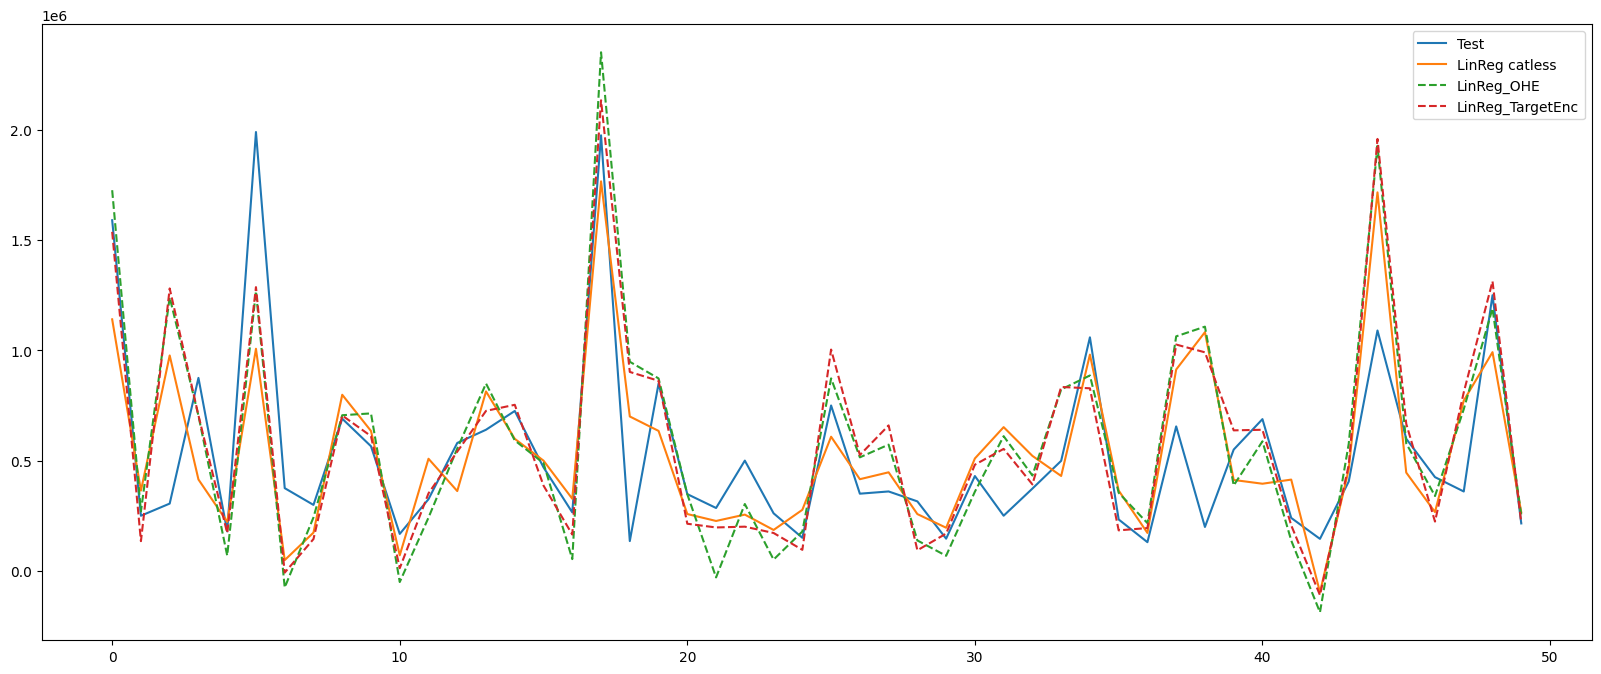

In [142]:
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

mae_linreg3 = mean_absolute_error(y_test, y_pred)
rmse_linreg3 = mean_squared_error(y_test, y_pred, squared=False)
print(f"MAE Catless: {mae_linreg1}")
print(f"RMSE Catless: {rmse_linreg1}")
print("OHE:")
print(f"MAE: {mae_linreg2}")
print(f"RMSE: {rmse_linreg2}")
print("Target Encoding:")
print(f"MAE: {mae_linreg3}")
print(f"RMSE: {rmse_linreg3}")

y_linreg_plot2 = y_pred[:50]
plt.figure(figsize=(20, 8))
plt.plot(y_test_plot, label="Test")
plt.plot(y_catless_linreg_plot, label="LinReg catless")
plt.plot(y_linreg_plot, label="LinReg_OHE", linestyle="--")
plt.plot(y_linreg_plot2, label="LinReg_TargetEnc", linestyle="--")
plt.legend()
plt.show()

Scree Plot и PCA

In [143]:
# Assuming X is a DataFrame
n_features = X.shape[1]
# Вычисление матрицы ковариации
cov_matrix = np.cov(X.T)
# Вычисление собственных значений и векторов
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
# Сортировка собственных значений и выбор двух главных компонент
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

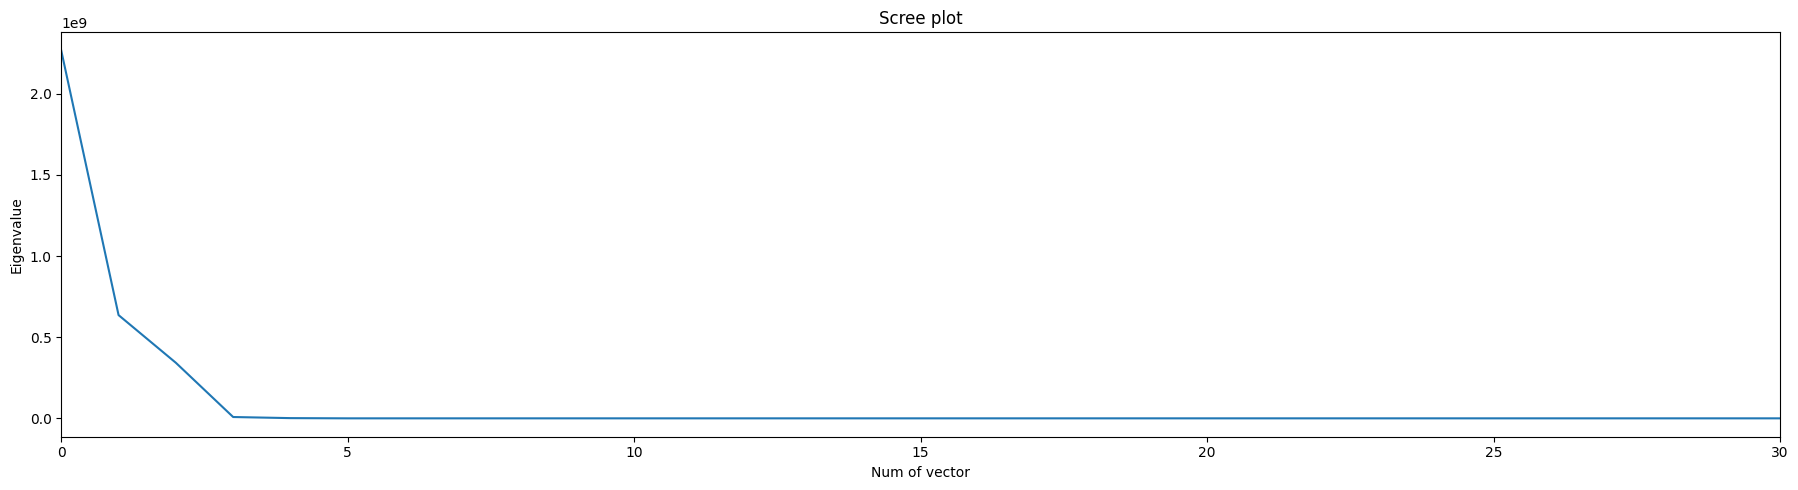

In [144]:
plt.figure(figsize=(18, 5))
plt.plot(range(len(eig_vals)), np.real(eig_vals))
plt.ylabel('Eigenvalue')
plt.xlabel('Num of vector')
plt.title('Scree plot')
plt.tight_layout()
plt.xlim(0, 30)
plt.show()

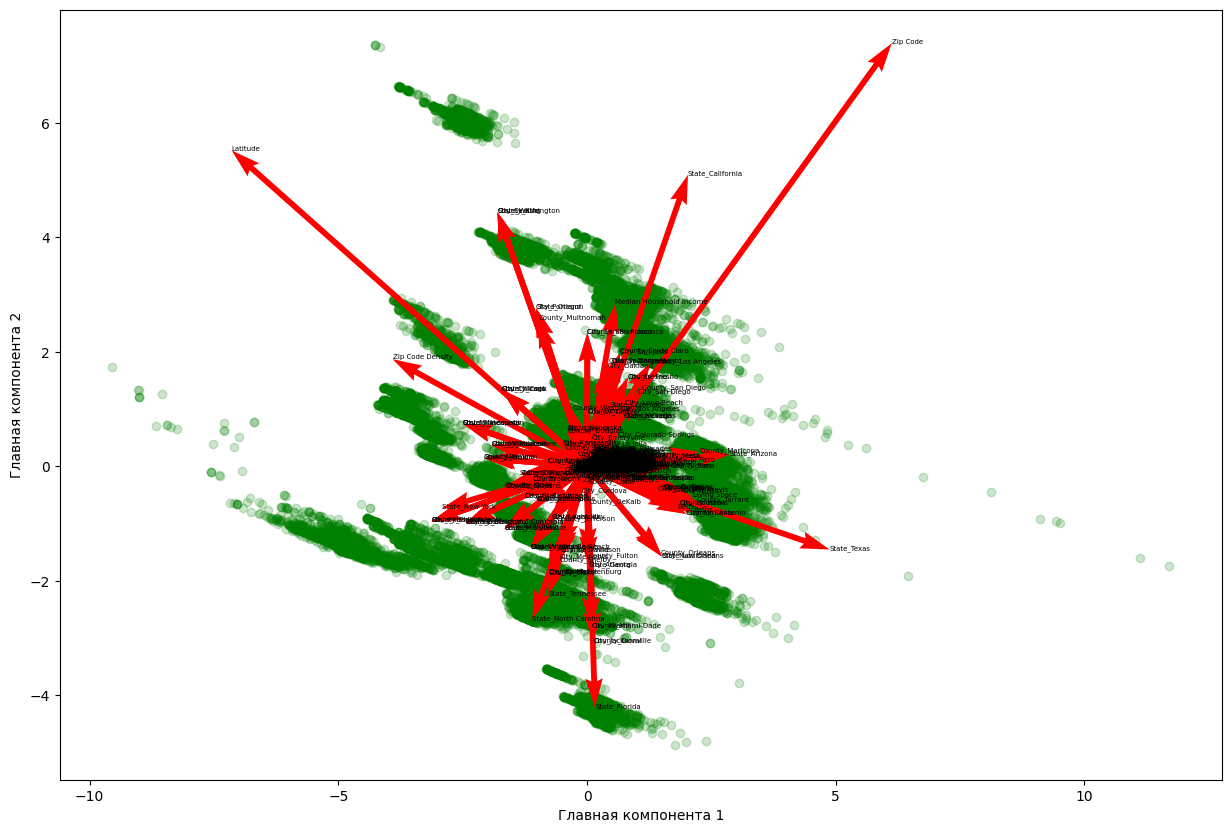

In [145]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

componetns_scale = 20

plt.figure(figsize=(15, 10))

scaler = StandardScaler()
pca = PCA(n_components=2)

x_train_norm = scaler.fit_transform(X) 
X_pca = pca.fit_transform(x_train_norm)
pca_components = pca.components_[:2, :] # извлечь первые 2 компоненты
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='green', alpha=0.2) # диаграмма рассеяния для двух главных компонент
plt.scatter(0, 0, color='red', lw=3) # красная точка в начале координат
# создание векторов, их масштабирование и аннтоации
for i, feature in enumerate(X.columns):
    plt.quiver(0, 0, pca_components[0, i]*componetns_scale, pca_components[1, i]*componetns_scale, angles='xy', scale_units='xy', scale=1, color='red', width=0.005)
    plt.annotate(feature, (pca_components[0, i]*componetns_scale, pca_components[1, i]*componetns_scale), color='black', fontsize=5)

plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()